## Importing libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import healpy as hp #for 3d rotation

sns.set_context("poster")
import scatter_plot_matrix as spm 
#see https://marcioodwyer.wordpress.com/2019/01/03/my-python-class-to-plot-correlated-variables/

%matplotlib inline

## Functions to generated data and plot projections

In [19]:
def rotate_vector(vec):
    """Function to simulate data from random 
    camera angle to observe oscillator"""
    a, b, c = np.random.uniform(-np.pi,np.pi,3)
    rotmat = hp.rotator.get_rotation_matrix((a,b,c))[0]
    return hp.rotator.rotateVector(rotmat, vec)

def scatter_3d(X):
    """ Makes 3d scatter plot of the oscillator
    measurements"""
    fig = plt.figure(figsize=(17,17))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0], X[1], X[2], s=10, c='k')
    
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    lim=1.5
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)

    plt.show()
    return

def scatter_2d_proj(X):
    """Make side-by-side plots of each plane projection."""
    fig, axes = plt.subplots(1,3,figsize=(17,5))
    axes[0].scatter(X[0], X[1], color='k', s=5)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[1].scatter(X[0], X[2], color='k', s=5)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('z')
    axes[2].scatter(X[1], X[2], color='k', s=5)
    axes[2].set_xlabel('y')
    axes[2].set_ylabel('z')
    for ax in axes:
        lim = 1.5
        ax.set_xlim(-lim,lim)
        ax.set_ylim(-lim,lim) 
    plt.subplots_adjust(wspace=.45)
    plt.show()
    return
    

def draw_data(n):
    """Simulate measuring the oscillator"""
    #time sampling
    t0 = np.random.uniform(0,10, n) 
    # position of oscilattor
    x0 = np.cos(t0)
    # noise
    sigma = .1
    x0 += np.random.normal(scale=sigma, size=len(x0))
    y0 = np.random.normal(scale=sigma, size=len(x0))
    z0 = np.random.normal(scale=sigma, size=len(x0))

    X0 = np.vstack((x0,y0,z0))
    # randomly rotate "camera"
    X = rotate_vector(X0)
    # returns original and rotated
    return X0, X

## Simulating and visualizing data

In [11]:
n = 300 #measurements
X0, X = draw_data(n) #original and rotated data
print("Data matrix has dimensions",X.shape)

Data matrix has dimensions (3, 300)


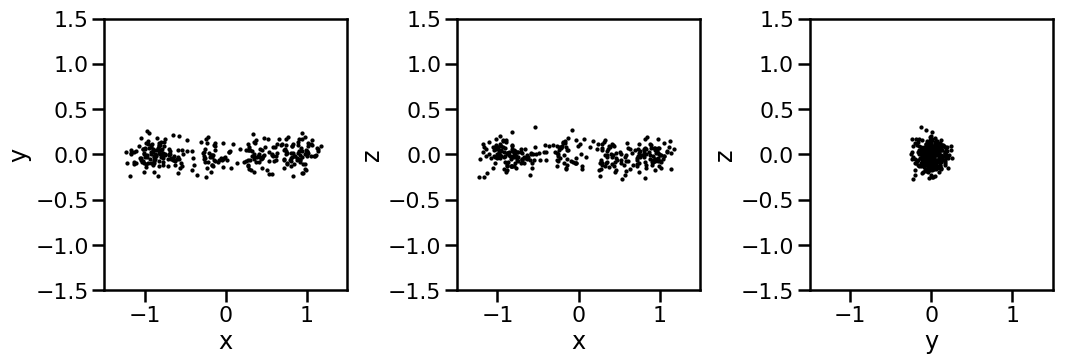

In [12]:
scatter_2d_proj(X0)